<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

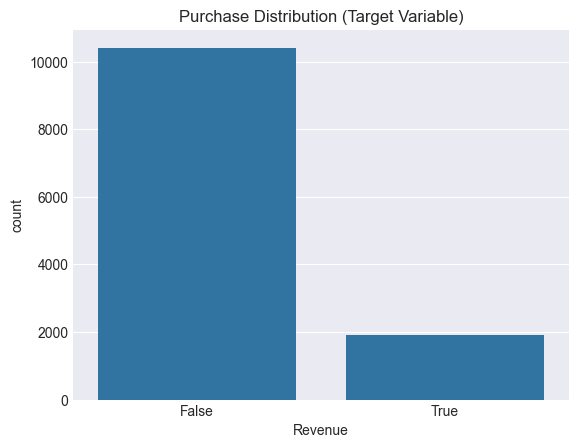

In [4]:
# 📘 01_data_preprocessing_and_eda.ipynb

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
df = pd.read_csv('../data/online_shoppers_intention.csv')  # adjust path if needed
df.head()

# Step 3: Quick info
df.info()
df.describe()
df.isnull().sum()

# Step 4: Target check
print("Target Distribution:")
print(df['Revenue'].value_counts(normalize=True))

# Step 5: Categorical + numerical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Columns:", cat_cols)
print("\nNumerical Columns:", num_cols)

# Step 6: Visuals (optional for now)
sns.countplot(data=df, x='Revenue')
plt.title("Purchase Distribution (Target Variable)")
plt.show()


--- Numerical Feature Distributions ---


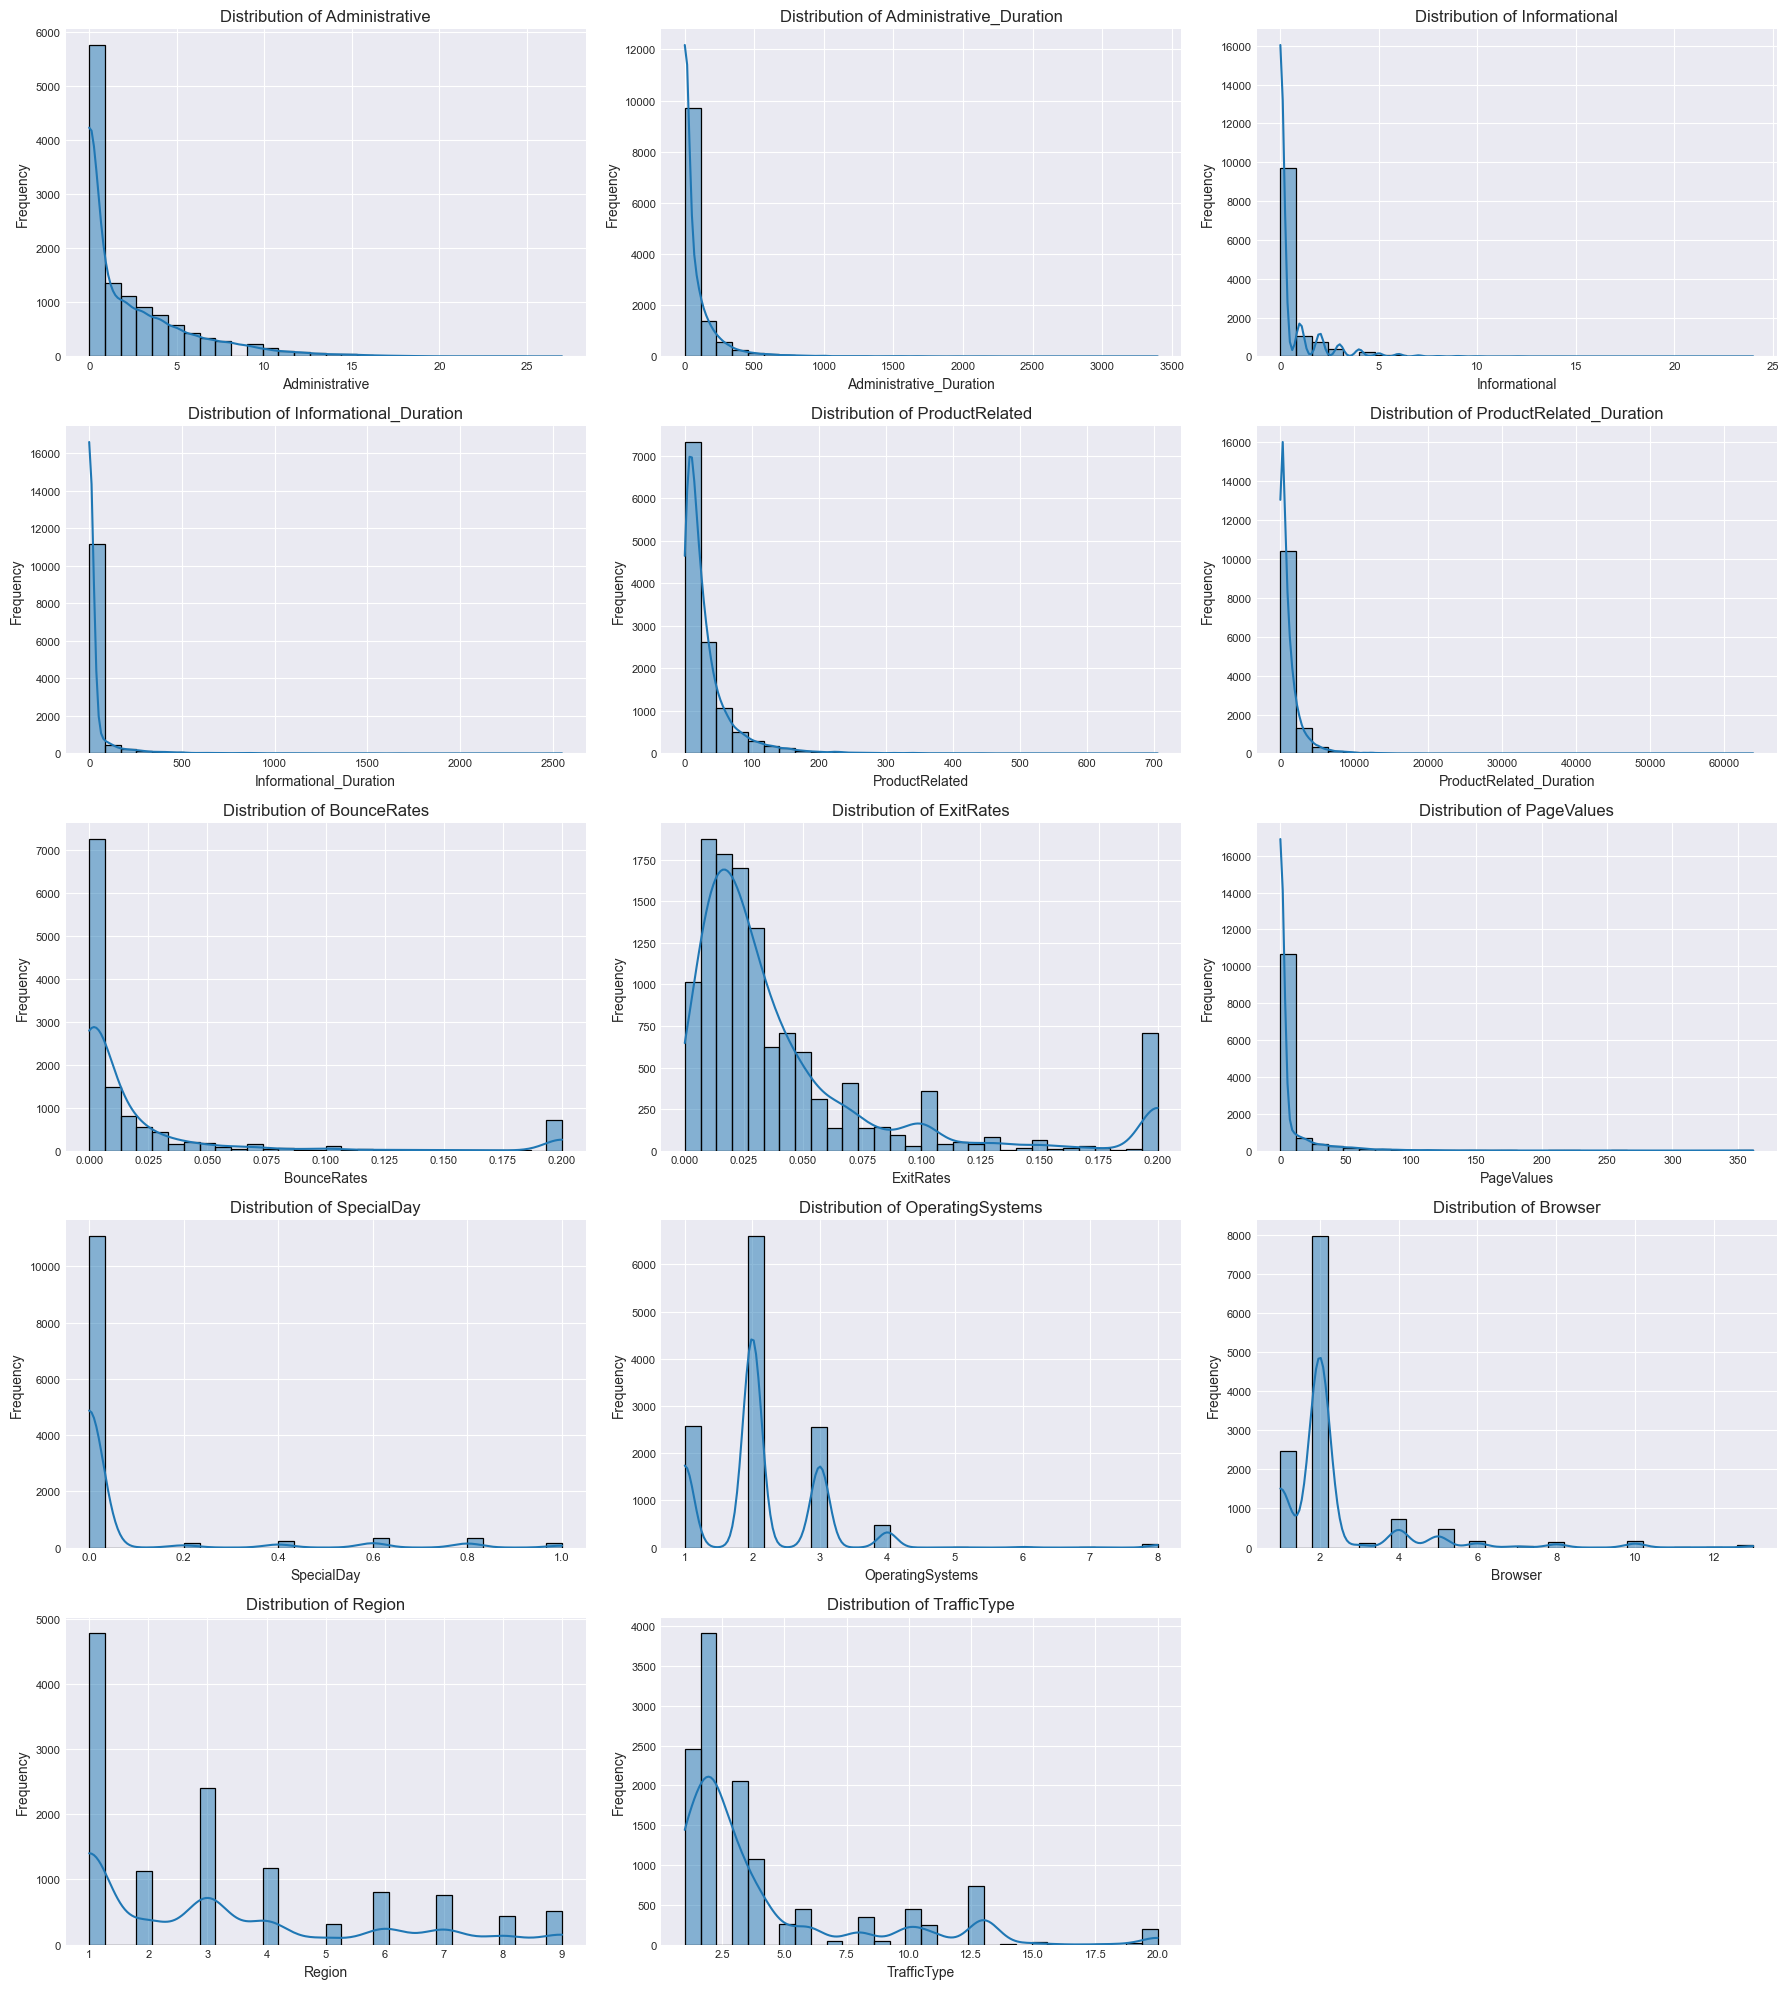


Observations from Numerical Feature Distributions:
- Many duration-related features (Administrative_Duration, Informational_Duration, ProductRelated_Duration) show heavy right-skewness, indicating most sessions have short durations, but some have very long ones.
- BounceRates and ExitRates are also heavily skewed towards lower values.
- PageValues has a strong peak at 0, suggesting many sessions do not generate direct value, but a long tail indicates significant values for some.
- SpecialDay has distinct peaks, indicating specific days with varying 'specialness'.
- OperatingSystems, Browser, Region, and TrafficType are integer-encoded categorical features; their distributions show counts for each category, indicating which are most common.


In [8]:
# --- Deeper EDA: Numerical Feature Distributions ---
print("--- Numerical Feature Distributions ---")
plt.style.use('seaborn-v0_8-darkgrid') # A nice style for plots

# Exclude boolean columns from num_cols for histograms, as they are effectively categorical
# 'Weekend' and 'Revenue' are already handled by countplot or are target
numerical_for_hist = [col for col in num_cols if col not in ['Weekend', 'Revenue']]

# Adjust figure size based on the number of numerical columns
n_rows = (len(numerical_for_hist) + 2) // 3 # Roughly 3 columns per row
plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(numerical_for_hist):
    plt.subplot(n_rows, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.tick_params(axis='x', labelsize=8)
    plt.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

print("\nObservations from Numerical Feature Distributions:")
print("- Many duration-related features (Administrative_Duration, Informational_Duration, ProductRelated_Duration) show heavy right-skewness, indicating most sessions have short durations, but some have very long ones.")
print("- BounceRates and ExitRates are also heavily skewed towards lower values.")
print("- PageValues has a strong peak at 0, suggesting many sessions do not generate direct value, but a long tail indicates significant values for some.")
print("- SpecialDay has distinct peaks, indicating specific days with varying 'specialness'.")
print("- OperatingSystems, Browser, Region, and TrafficType are integer-encoded categorical features; their distributions show counts for each category, indicating which are most common.")


--- Categorical Feature Distributions ---


C:\Users\ashan\AppData\Local\Temp\ipykernel_5024\1192705654.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Month', order=df['Month'].value_counts().index, palette='viridis')
C:\Users\ashan\AppData\Local\Temp\ipykernel_5024\1192705654.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='VisitorType', order=df['VisitorType'].value_counts().index, palette='plasma')


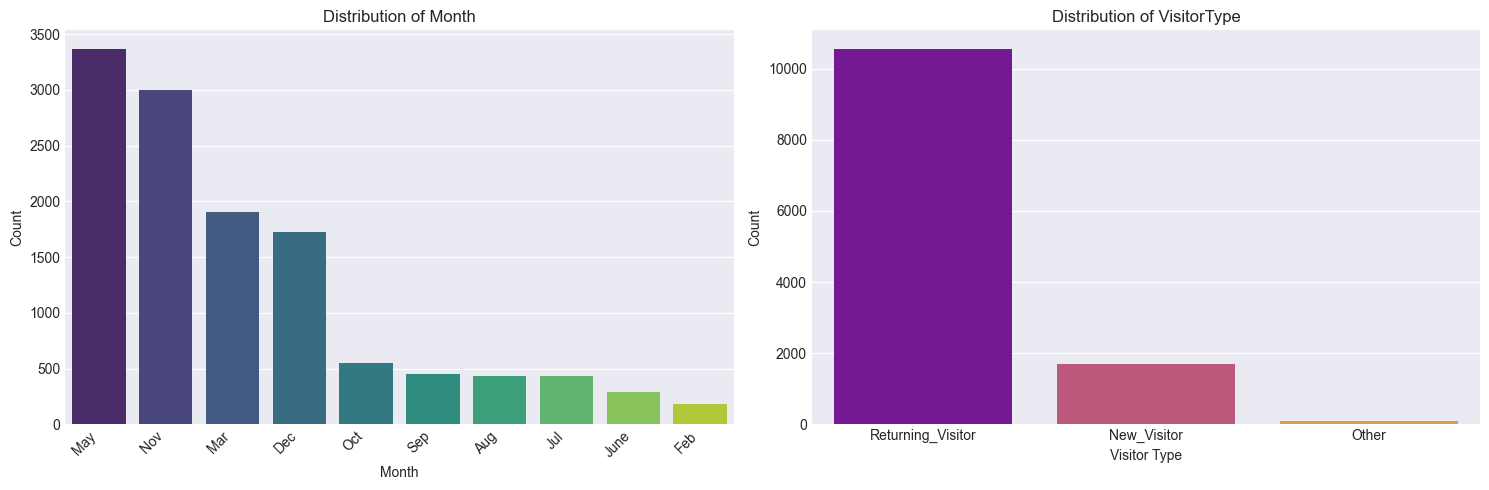


Observations from Categorical Feature Distributions:
- 'Month': Some months (e.g., May, Nov, Mar, Dec) have significantly more sessions, likely reflecting seasonal shopping trends.
- 'VisitorType': The vast majority of visitors are 'Returning_Visitor', followed by 'New_Visitor', and very few 'Other'. This suggests a strong returning customer base.


In [13]:
# --- Deeper EDA: Categorical Feature Analysis ---
print("\n--- Categorical Feature Distributions ---")

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Month', order=df['Month'].value_counts().index, palette='viridis')
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='VisitorType', order=df['VisitorType'].value_counts().index, palette='plasma')
plt.title('Distribution of VisitorType')
plt.xlabel('Visitor Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print("\nObservations from Categorical Feature Distributions:")
print("- 'Month': Some months (e.g., May, Nov, Mar, Dec) have significantly more sessions, likely reflecting seasonal shopping trends.")
print("- 'VisitorType': The vast majority of visitors are 'Returning_Visitor', followed by 'New_Visitor', and very few 'Other'. This suggests a strong returning customer base.")


--- Feature Relationships with Revenue ---


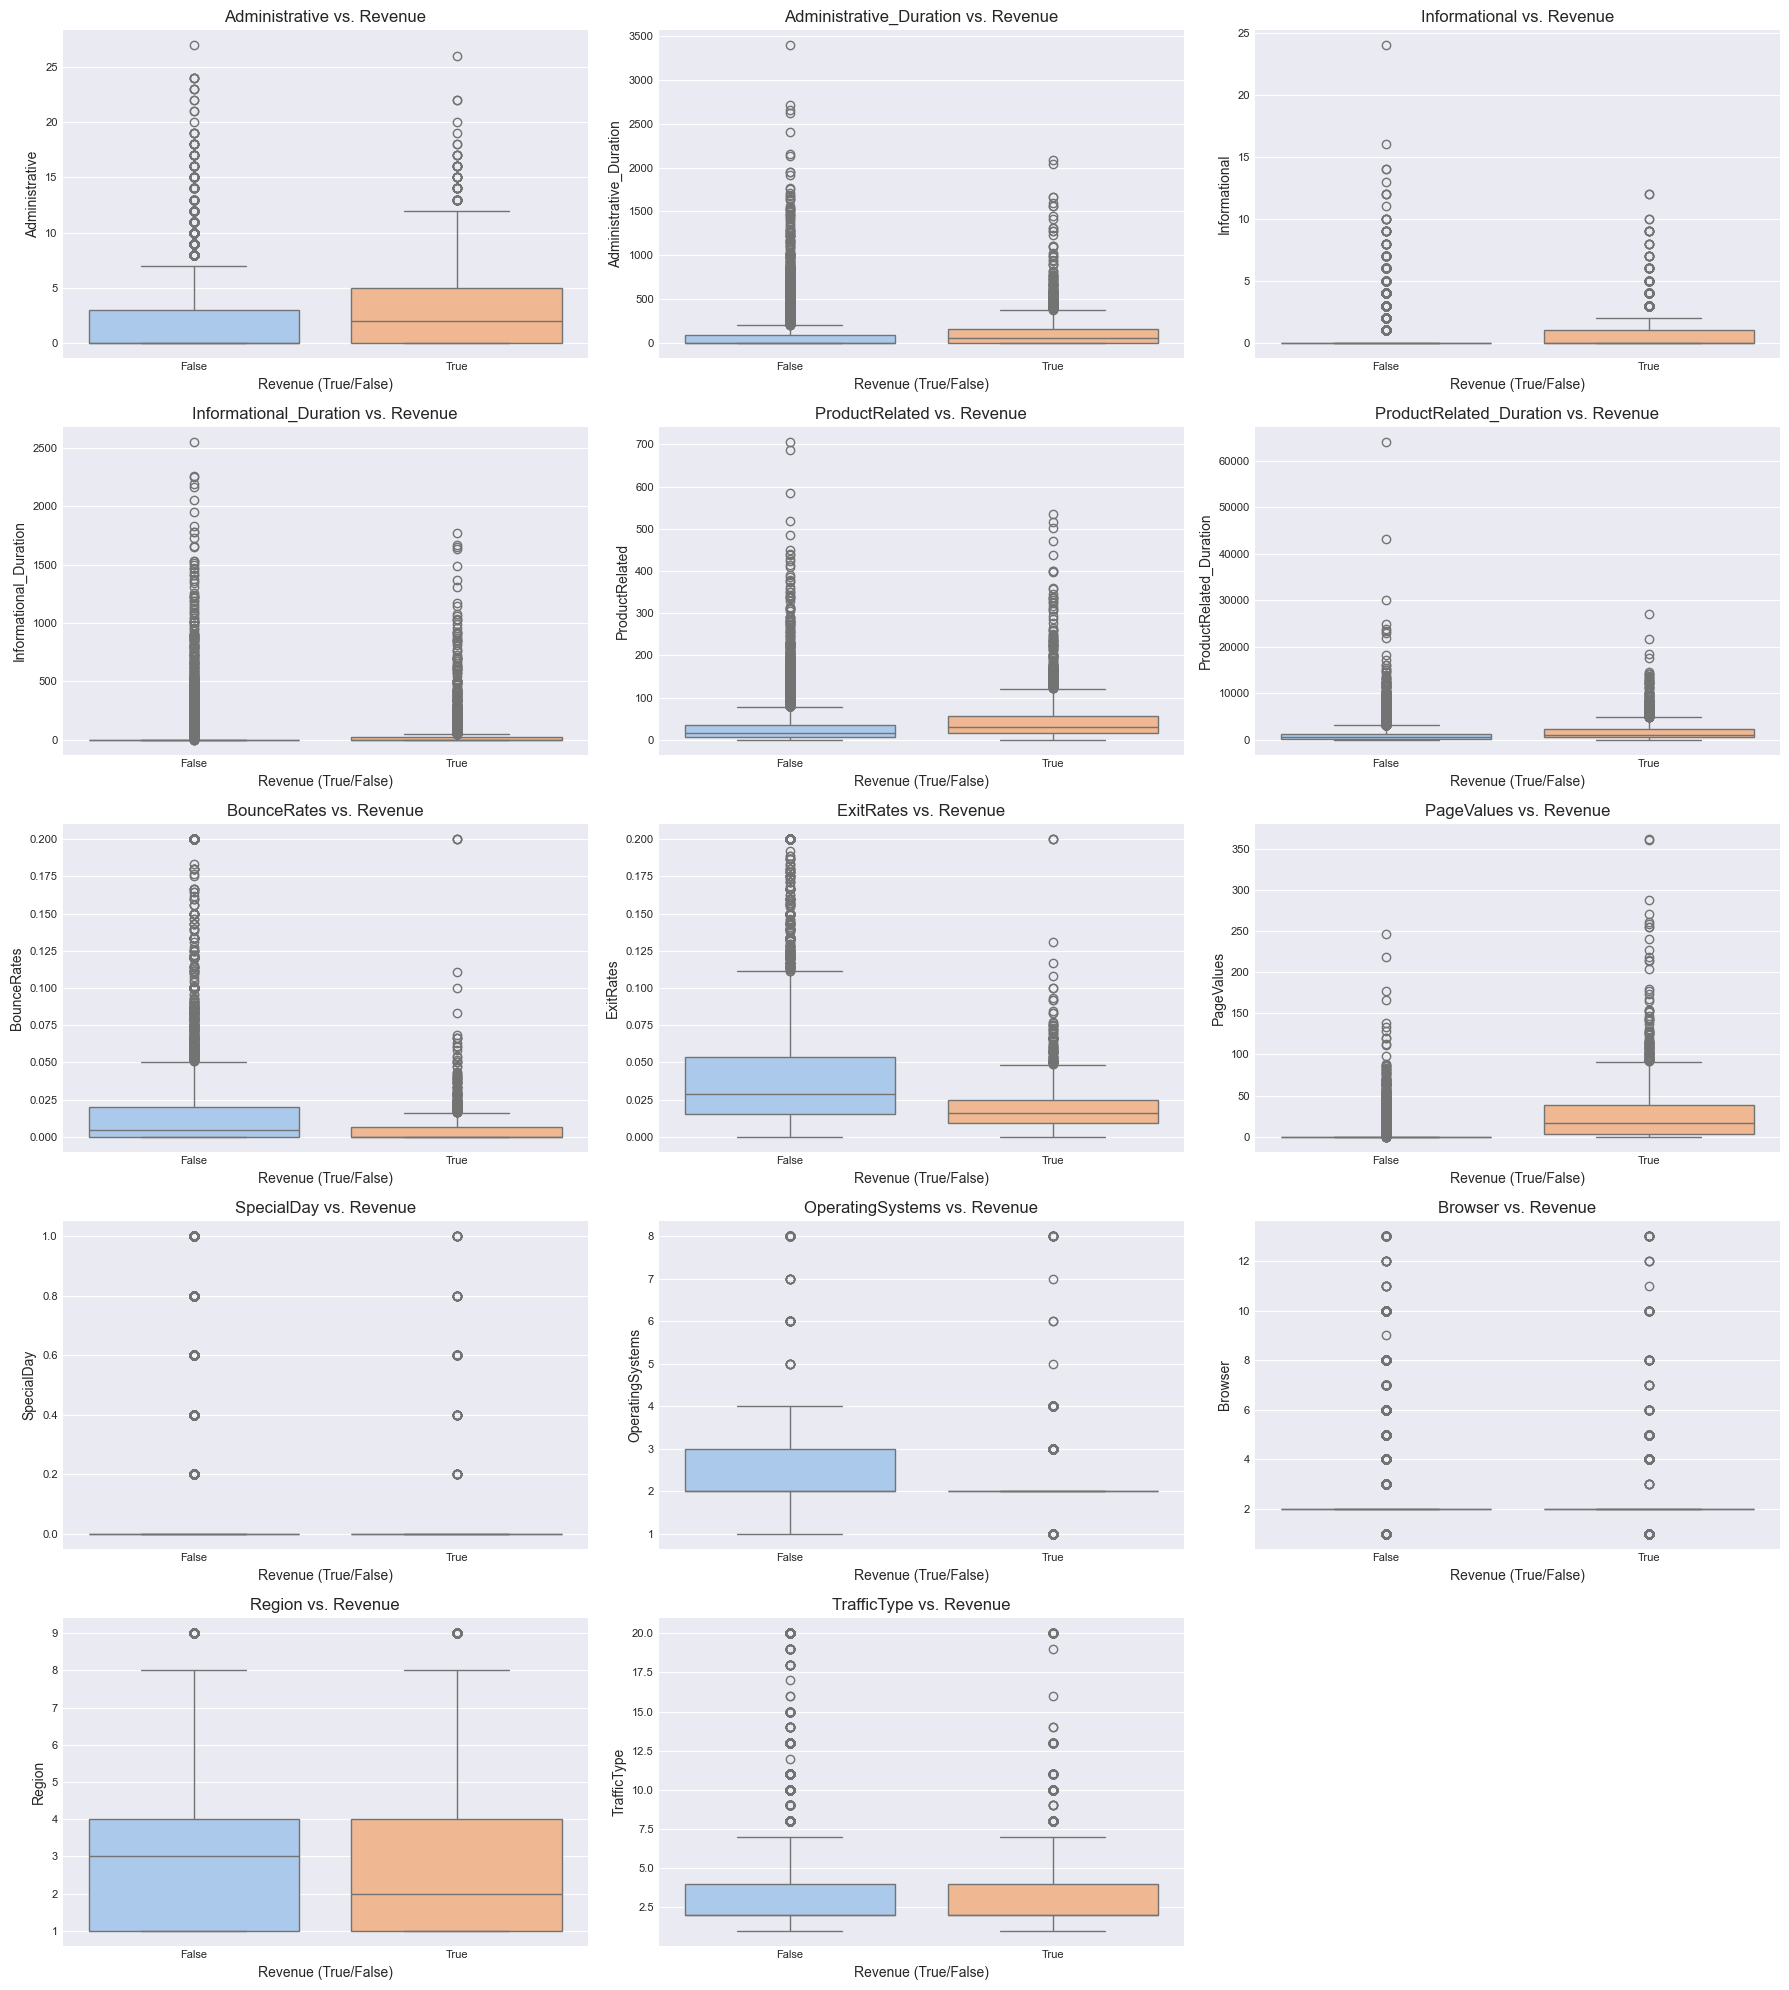


Observations from Numerical Features vs. Revenue:
- 'PageValues' shows a very clear separation: purchases (True) are almost exclusively associated with higher page values, while non-purchases (False) mostly have zero page values. This is a strong predictor.
- Duration features (Administrative_Duration, Informational_Duration, ProductRelated_Duration) tend to have slightly higher medians and wider distributions for 'True' (purchase) sessions, suggesting longer engagement for purchasers.
- 'BounceRates' and 'ExitRates' are generally lower for purchasing sessions, indicating less abandonment.
- 'SpecialDay': lower values (meaning closer to a special day) seem to be associated with purchases.
- OperatingSystems, Browser, Region, TrafficType: while their distributions are shown, their relationship with revenue is complex and might require further analysis or specific encoding.

Categorical Features vs. Revenue (Proportions):

--- Month vs. Revenue ---
Revenue     False     True 
Month     

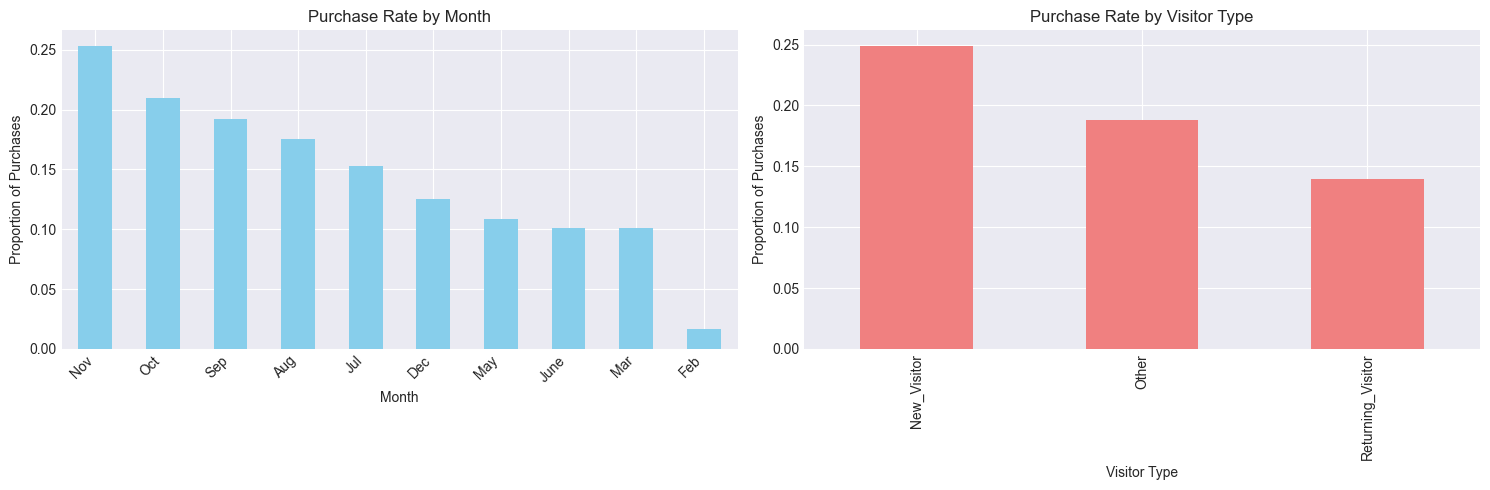


Observations from Categorical Features vs. Revenue (Proportions):
- 'Month': December and November appear to have much higher purchase rates, likely due to holiday shopping. Some months have very low rates.
- 'VisitorType': 'New_Visitor' has a significantly higher purchase rate than 'Returning_Visitor' or 'Other'. This is a counter-intuitive but important finding, suggesting new visitors are often making their first purchase, while returning visitors might be Browse or researching.


In [ ]:
# --- EDA: Relationship with Target Variable (Revenue) ---
print("\n--- Feature Relationships with Revenue ---")

# Numerical Features vs. Revenue (Box Plots)
plt.figure(figsize=(18, n_rows * 4)) # Re-using n_rows from numerical_for_hist
for i, col in enumerate(numerical_for_hist):
    plt.subplot(n_rows, 3, i + 1)
    sns.boxplot(data=df, x='Revenue', y=col, hue='Revenue', palette='pastel', legend=False)
    plt.title(f'{col} vs. Revenue', fontsize=12)
    plt.xlabel('Revenue (True/False)', fontsize=10)
    plt.ylabel(col, fontsize=10)
    plt.tick_params(axis='x', labelsize=8)
    plt.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

print("\nObservations from Numerical Features vs. Revenue:")
print("- 'PageValues' shows a very clear separation: purchases (True) are almost exclusively associated with higher page values, while non-purchases (False) mostly have zero page values. This is a strong predictor.")
print("- Duration features (Administrative_Duration, Informational_Duration, ProductRelated_Duration) tend to have slightly higher medians and wider distributions for 'True' (purchase) sessions, suggesting longer engagement for purchasers.")
print("- 'BounceRates' and 'ExitRates' are generally lower for purchasing sessions, indicating less abandonment.")
print("- 'SpecialDay': lower values (meaning closer to a special day) seem to be associated with purchases.")
print("- OperatingSystems, Browser, Region, TrafficType: while their distributions are shown, their relationship with revenue is complex and might require further analysis or specific encoding.")

# Categorical Features vs. Revenue (Stacked Bar Plots or Proportions)
print("\nCategorical Features vs. Revenue (Proportions):")
for col in cat_cols:
    # Calculate proportions of Revenue for each category
    #cross_tab = pd.crosstab(df[col], df['Revenue'], normalize='index')
    #print(f"\n--- {col} vs. Revenue ---")
    #print(cross_tab)

    # Optional: Plotting as a stacked bar chart if desired
    cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'Revenue Proportion by {col}')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Revenue')
    plt.show()

# Example: Month and VisitorType (if you want plots for these specific ones)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
month_revenue_prop = pd.crosstab(df['Month'], df['Revenue'], normalize='index')
month_revenue_prop[True].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Purchase Rate by Month')
plt.xlabel('Month')
plt.ylabel('Proportion of Purchases')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
visitor_revenue_prop = pd.crosstab(df['VisitorType'], df['Revenue'], normalize='index')
visitor_revenue_prop[True].sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Purchase Rate by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Proportion of Purchases')

plt.tight_layout()
plt.show()

print("\nObservations from Categorical Features vs. Revenue (Proportions):")
print("- 'Month': December and November appear to have much higher purchase rates, likely due to holiday shopping. Some months have very low rates.")
print("- 'VisitorType': 'New_Visitor' has a significantly higher purchase rate than 'Returning_Visitor' or 'Other'. This is a counter-intuitive but important finding, suggesting new visitors are often making their first purchase, while returning visitors might be Browse or researching.")


--- Correlation Matrix of Numerical Features ---


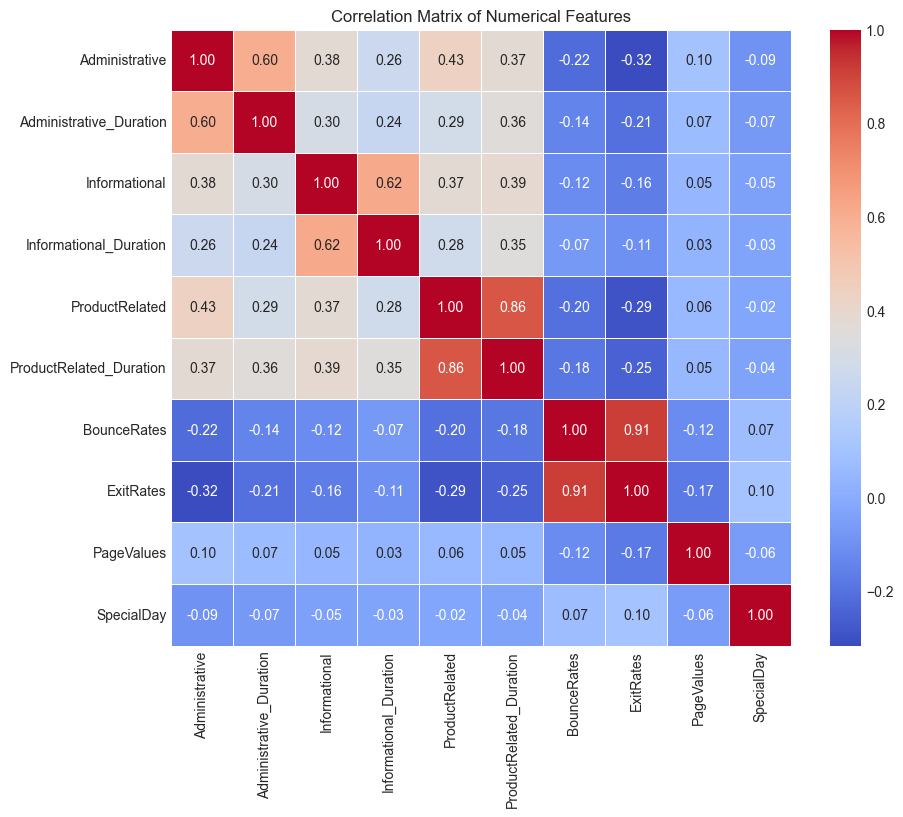


Observations from Correlation Matrix:
- 'ProductRelated' and 'ProductRelated_Duration' are highly correlated, which is expected (more products viewed usually means more time spent).
- 'Administrative' and 'Administrative_Duration' are also highly correlated.
- 'Informational' and 'Informational_Duration' show similar high correlation.
- 'BounceRates' and 'ExitRates' are also highly correlated. This makes sense as a high bounce rate often implies a high exit rate from that page.
- PageValues shows moderate negative correlation with BounceRates and ExitRates, which is expected (higher value means less likely to bounce/exit).
- High correlations between some features (e.g., BounceRates and ExitRates) might suggest multicollinearity, which we should keep in mind for certain models (like Linear Regression, though less critical for tree-based models). We might consider feature selection or PCA later if needed.


In [11]:
# --- EDA: Correlation Matrix ---
print("\n--- Correlation Matrix of Numerical Features ---")

# Select only numerical columns for correlation matrix
# Exclude 'OperatingSystems', 'Browser', 'Region', 'TrafficType' as they are encoded categories
# Exclude 'Weekend', 'Revenue' as they are boolean (handled differently or are target)
correlation_cols = [col for col in numerical_for_hist if col not in ['OperatingSystems', 'Browser', 'Region', 'TrafficType']]

correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("\nObservations from Correlation Matrix:")
print("- 'ProductRelated' and 'ProductRelated_Duration' are highly correlated, which is expected (more products viewed usually means more time spent).")
print("- 'Administrative' and 'Administrative_Duration' are also highly correlated.")
print("- 'Informational' and 'Informational_Duration' show similar high correlation.")
print("- 'BounceRates' and 'ExitRates' are also highly correlated. This makes sense as a high bounce rate often implies a high exit rate from that page.")
print("- PageValues shows moderate negative correlation with BounceRates and ExitRates, which is expected (higher value means less likely to bounce/exit).")
print("- High correlations between some features (e.g., BounceRates and ExitRates) might suggest multicollinearity, which we should keep in mind for certain models (like Linear Regression, though less critical for tree-based models). We might consider feature selection or PCA later if needed.")